In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 41.4MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

np.float64(-0.0007166951100705492)

In [ ]:
model.coef_

array([ 0.06263876, -0.0314448 , -0.04929425,  0.03103322,  0.02510646,
       -0.06263876,  0.05605934,  0.79637477, -0.0154165 , -0.00336506,
        0.01208617,  0.01249372,  0.00230881, -0.02909264, -0.01445952,
       -0.02008649, -0.02922952])

In [ ]:
model.score(X_train,y_train)

0.9426972035142231

In [ ]:
model.error_list()

AttributeError: 'LinearRegression' object has no attribute 'error_list'

## Write our own LR Function from scratch

In [ ]:
import numpy as np


class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=200):
    self.learning_rate = learning_rate
    self.iterations = iterations


In [ ]:
def predict(self, X):
  return np.dot(X, self.W)+self.b


In [ ]:
LinearRegression.predict= predict

In [ ]:
def r2_score(self, X, y):
  y_ = predict(self,X)
  ss_res = np.sum((y-y_)**2)
  ss_tot = np.sum((y- y.mean())**2)
  score = (1- ss_res/ss_tot)
  return score

LinearRegression.score=r2_score

In [ ]:
X.shape

(19820, 17)

In [ ]:
def update_weights(self):
  Y_pred = self.predict( self.X )

  # calculate gradients
  dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
  db = - 2*np.sum(self.Y - Y_pred)/self.m

  # update weights
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db
  return self

In [ ]:
def fit(self,X,Y ):
  self.m, self.d = X.shape

  ## Weight Initialisation
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.Y = Y
  self.error_list = []



  ## Gradient Descent Learning

  for i in range(self.iterations):
    self.update_weights()

    Y_pred = X.dot(self.W) + self.b

    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)

  return self


In [ ]:
LinearRegression.update_weights=update_weights


In [ ]:
LinearRegression.fit=fit

In [ ]:
lr_new = LinearRegression()

In [ ]:
lr_new.fit(X_train, y_train)

In [ ]:
lr_new.predict(X_test)

array([-0.88576494, -0.30650237,  2.51721671, ...,  0.5457728 ,
       -0.57198616,  0.05599245])

In [ ]:
lr_new.b

np.float64(0.0008746984535898379)

In [ ]:
lr_new.W

,0
year,0.111953
km_driven,-0.041940
mileage,-0.051910
engine,0.065718
max_power,0.125462
age,-0.111953
make,0.176893
model,0.475222
Individual,-0.018439
Trustmark Dealer,-0.005208


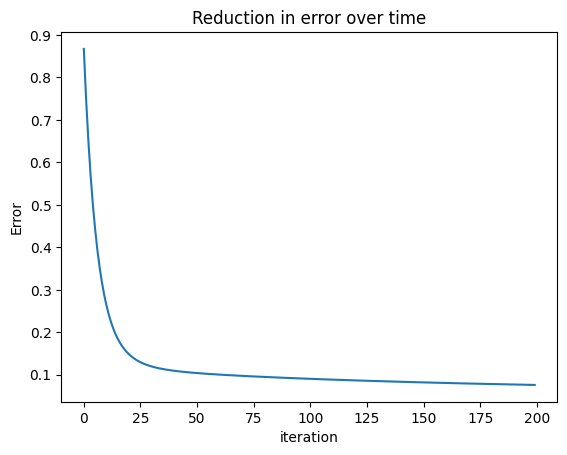

In [ ]:
%matplotlib inline
fig = plt.figure()

plt.plot(lr_new.error_list)

plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()